<a href="https://colab.research.google.com/github/StevenBryceLee/DS-Unit-2-Applied-Modeling/blob/master/module3-permutation-boosting/Copy_of_LS_DS_233_assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
#Notes
#https://colab.research.google.com/drive/1IrmSOtZ6sP5oOOuzJKlH2CfMu4UwhDGQ

Lambda School Data Science

*Unit 2, Sprint 3, Module 3*

---


# Permutation & Boosting

You will use your portfolio project dataset for all assignments this sprint.

## Assignment

Complete these tasks for your project, and document your work.

- [ ] If you haven't completed assignment #1, please do so first.
- [ ] Continue to clean and explore your data. Make exploratory visualizations.
- [ ] Fit a model. Does it beat your baseline? 
- [ ] Try xgboost.
- [ ] Get your model's permutation importances.

You should try to complete an initial model today, because the rest of the week, we're making model interpretation visualizations.

But, if you aren't ready to try xgboost and permutation importances with your dataset today, that's okay. You can practice with another dataset instead. You may choose any dataset you've worked with previously.

The data subdirectory includes the Titanic dataset for classification and the NYC apartments dataset for regression. You may want to choose one of these datasets, because example solutions will be available for each.


## Reading

Top recommendations in _**bold italic:**_

#### Permutation Importances
- _**[Kaggle / Dan Becker: Machine Learning Explainability](https://www.kaggle.com/dansbecker/permutation-importance)**_
- [Christoph Molnar: Interpretable Machine Learning](https://christophm.github.io/interpretable-ml-book/feature-importance.html)

#### (Default) Feature Importances
  - [Ando Saabas: Selecting good features, Part 3, Random Forests](https://blog.datadive.net/selecting-good-features-part-iii-random-forests/)
  - [Terence Parr, et al: Beware Default Random Forest Importances](https://explained.ai/rf-importance/index.html)

#### Gradient Boosting
  - [A Gentle Introduction to the Gradient Boosting Algorithm for Machine Learning](https://machinelearningmastery.com/gentle-introduction-gradient-boosting-algorithm-machine-learning/)
  - [An Introduction to Statistical Learning](http://www-bcf.usc.edu/~gareth/ISL/ISLR%20Seventh%20Printing.pdf), Chapter 8
  - _**[Gradient Boosting Explained](https://www.gormanalysis.com/blog/gradient-boosting-explained/)**_ — Ben Gorman
  - [Gradient Boosting Explained](http://arogozhnikov.github.io/2016/06/24/gradient_boosting_explained.html) — Alex Rogozhnikov
  - [How to explain gradient boosting](https://explained.ai/gradient-boosting/) — Terence Parr & Jeremy Howard

###Try xgboost.


In [5]:
!pip install category_encoders

     |████████████████████████████████| 81kB 3.3MB/s 


In [6]:
import pandas as pd
test = pd.read_csv('features_test.csv')
trainLabels = pd.read_csv('labels_train.csv')
trainFeatures = pd.read_csv('features_train.csv')
train = pd.merge(trainFeatures,trainLabels,on=trainLabels.columns[:-1].tolist())

In [7]:
def wrangle(df):
  '''
  This function wrangles training and testing data from the DengAI datasets

  df is a pandas df with either train or test data 

  returns a cleaned df
  '''
  #Drop empty rows
  #df.drop(df[df.weekofyear==53].index,inplace=True)

  #convert datetime
  df.week_start_date = pd.to_datetime(df.week_start_date)
  #Get days, months, years
  df['years'] = df.week_start_date.apply(lambda x: x.year)
  df['months'] = df.week_start_date.apply(lambda x: x.month)
  df['days'] = df.week_start_date.apply(lambda x: x.day)

  #Drop datetime object type
  df.drop(['week_start_date',
           #'weekofyear'
           ],axis=1, inplace = True)

  # #Only applying to the training dataset, which contains labels
  if 'total_cases' in df.columns:
    df.dropna(axis=0,thresh=len(df.columns)-8,inplace=True)


  return df
train = wrangle(train)
test = wrangle(test)

In [10]:

from sklearn.model_selection import train_test_split
X = train.drop('total_cases',axis=1)
y = train.total_cases
X_train,X_val,y_train,y_val = train_test_split(X,y,test_size = 0.25,random_state=42)

In [11]:
from xgboost import XGBClassifier
from category_encoders import OrdinalEncoder
from sklearn.impute import SimpleImputer
from sklearn.pipeline import make_pipeline
import numpy as np
import pandas as pd
train_test_split
pipe = make_pipeline(
    OrdinalEncoder(), 
    SimpleImputer(), 
    XGBClassifier(n_jobs=10, early_stopping_rounds=10)
)

pipe.fit(X_train,y_train)


/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


Pipeline(memory=None,
         steps=[('ordinalencoder',
                 OrdinalEncoder(cols=['city'], drop_invariant=False,
                                handle_missing='value', handle_unknown='value',
                                mapping=[{'col': 'city',
                                          'data_type': dtype('O'),
                                          'mapping': sj     1
iq     2
NaN   -2
dtype: int64}],
                                return_df=True, verbose=0)),
                ('simpleimputer',
                 SimpleImputer(add_indicator=False, copy=True, fill_value=None,
                               missing_values=nan, stra...
                               colsample_bylevel=1, colsample_bynode=1,
                               colsample_bytree=1, early_stopping_rounds=10,
                               gamma=0, learning_rate=0.1, max_delta_step=0,
                               max_depth=3, min_child_weight=1, missing=None,
                               n_est

######Get your model's permutation importances.

In [13]:

fi = pipe.named_steps['xgbclassifier'].feature_importances_
importances = pd.Series(fi,X_train.columns).sort_values(ascending=False)
importances

reanalysis_min_air_temp_k                0.066395
year                                     0.065597
reanalysis_tdtr_k                        0.052076
months                                   0.051913
weekofyear                               0.049914
reanalysis_max_air_temp_k                0.045438
reanalysis_specific_humidity_g_per_kg    0.043223
station_min_temp_c                       0.042684
station_diur_temp_rng_c                  0.042182
reanalysis_avg_temp_k                    0.041966
station_max_temp_c                       0.041417
ndvi_ne                                  0.040426
reanalysis_air_temp_k                    0.040087
station_avg_temp_c                       0.039897
reanalysis_relative_humidity_percent     0.038644
ndvi_sw                                  0.038519
reanalysis_dew_point_temp_k              0.038294
ndvi_nw                                  0.038127
reanalysis_precip_amt_kg_per_m2          0.037599
ndvi_se                                  0.037384


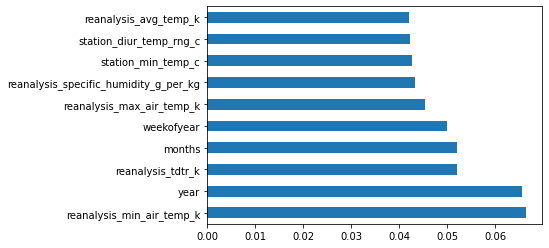

In [14]:
importances.head(10).plot(kind='barh')

In [16]:
col = 'city'
X_val_permuted = X_val.copy()
X_val_permuted[col] = np.random.permutation(X_val_permuted[col])
pipe.score(X_val_permuted, y_val)

0.10497237569060773